In [1]:
import pandas as pd
from scipy import stats

In [2]:
biomark = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/USTEK/statistics/vysledky_biomarkery_pacientiUSTekinumab_20.11.25.tsv", sep='\t')
biomark.set_index('SampleID', inplace=True)

metadata = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/USTEK/NGS/input/metadata_ustek_new.tsv", sep='\t')
metadata = metadata.iloc[1:]
metadata.rename(columns={"#SampleID": "SampleID"}, inplace=True)
metadata.set_index('SampleID', inplace=True)

biomark = biomark.merge(metadata, how='left', left_index=True, right_index=True)
biomark.at['30_KM_1', 'Label'] = "30_KM_1"
biomark.at['30_KM_1', 'Age'] = biomark.loc["30_KM_2", "Age"]
biomark.at['30_KM_1', 'Sex'] = biomark.loc["30_KM_2", "Sex"]
biomark.at['30_KM_1', 'Dg'] = biomark.loc["30_KM_2", "Dg"]
biomark.at['30_KM_1', 'Drug'] = biomark.loc["30_KM_2", "Drug"]
biomark.at['30_KM_1', 'HBI_num'] = 8
biomark.at['18_SJ_6', 'Label'] = "18_SJ_6"
biomark.at['18_SJ_6', 'Age'] = biomark.loc["18_SJ_1", "Age"]
biomark.at['18_SJ_6', 'Sex'] = biomark.loc["18_SJ_1", "Sex"]
biomark.at['18_SJ_6', 'Dg'] = biomark.loc["18_SJ_1", "Dg"]
biomark.at['18_SJ_6', 'Drug'] = biomark.loc["18_SJ_1", "Drug"]
biomark.at['18_SJ_6', 'HBI_num'] = 3

biomark['osteo'] = biomark['osteo'].astype(float)
biomark['HBI_num'] = biomark['HBI_num'].astype(float)


In [3]:
stats.spearmanr(biomark['osteo'], biomark['HBI_num'], nan_policy='omit')

SpearmanrResult(correlation=0.3556094874182006, pvalue=0.05378521838171568)

<AxesSubplot:xlabel='osteo', ylabel='HBI_num'>

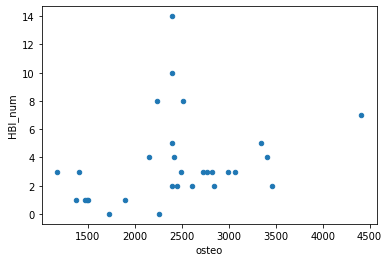

In [4]:
biomark.plot.scatter(x='osteo', y='HBI_num')